In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
import warnings
import re

warnings.filterwarnings('ignore')

In [78]:

# Cargar el conjunto de datos
data = pd.read_excel('imdb_anime.xlsx')
data

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
0,One Piece,"Animation, Action, Adventure",8.9,187689,24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895,99 min,-2023,The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108,92 min,-2023,A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457,24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909,24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45712,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.3,3432,24 min,(2019– ),Tanjiro heads to his next location southeast; ...,NaN,TV-14,NaN,3432,1,Tsuzumi Mansion
45713,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.9,3309,24 min,(2019– ),Tanjiro gets separated from Zenitsu when he en...,NaN,TV-MA,NaN,3309,1,"The Boar Bares Its Fangs, Zenitsu Sleeps"
45714,One Piece,"Animation, Action, Adventure",9.4,2743,NaN,(1999– ),Carrot tells Sanji the news about Pedro. Germa...,"Mayumi Tanaka,Tom Henry,Masako Katsuki,Mami Ko...",TV-14,NaN,2743,1,Time for Farewell! Pudding's One Last Request!
45715,Marmalade Boy,"Animation, Comedy, Drama",NaN,NaN,24 min,(1994–2005),NaN,"Ogie Banks,Deborah Sale Butler,John DeMita,Ric...",Not Rated,NaN,NaN,1,Hijiri naru yoru (ivu nanoni hitori bocchi...)


```
1. Realiza un análisis de calidad de datos, revisando aspectos básicos y selecciona un
primer conjunto de variables a eliminar. Luego de ello, realiza un análisis exploratorio
inicial considerando gráficos de distribuciones de las diferentes variables, y concluye
al respecto. Si observas algo raro respecto a los tipos de variables debes proponer
algún tratamiento.

```

In [79]:
missing_values = data.isnull().sum()
missing_values

Title                  0
Genre                  0
User Rating        20708
Number of Votes    20708
Runtime            13168
Year                 126
Summary            22170
Stars              32041
Certificate        17023
Metascore          45376
Gross              20708
Episode                0
Episode Title      10807
dtype: int64

In [80]:
print(data.dtypes)

Title              object
Genre              object
User Rating        object
Number of Votes    object
Runtime            object
Year               object
Summary            object
Stars              object
Certificate        object
Metascore          object
Gross              object
Episode            object
Episode Title      object
dtype: object


In [81]:
print("Valores únicos por columna:")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"{column}: {unique_values}")

Valores únicos por columna:
Title: ['One Piece' 'Teenage Mutant Ninja Turtles: Mutant Mayhem'
 'The Super Mario Bros. Movie' ...
 'Kochira Katsushika-ku Kameari Koen Mae Hashutsujo'
 'Izumo: Flash of a Brave Sword' 'Future GPX Cyber Formula']
Genre: ['Animation, Action, Adventure' 'Animation, Adventure, Comedy'
 'Animation, Drama, Family' 'Animation, Action, Drama'
 'Animation, Adventure, Drama' 'Animation, Action, Comedy'
 'Animation, Adventure, Family' 'Animation, Crime, Drama'
 'Animation, Drama, Fantasy' 'Animation, Comedy, Family'
 'Animation, Comedy, Drama' 'Animation, Family, Fantasy'
 'Animation, Drama, War' 'Animation, Adventure, Mystery'
 'Animation, Action, Fantasy' 'Animation, Action, Crime'
 'Animation, Drama' 'Animation, Biography, Drama'
 'Animation, Comedy, Romance' 'Animation, Adventure, Sci-Fi'
 'Animation, Sport, Thriller' 'Animation, Drama, Thriller'
 'Animation, Drama, Horror' 'Animation, Action, Sport' 'Animation, Comedy'
 'Animation, Action, Sci-Fi' 'Animation, D

In [82]:
data = data.drop_duplicates()
data

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
0,One Piece,"Animation, Action, Adventure",8.9,187689,24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895,99 min,-2023,The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108,92 min,-2023,A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457,24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909,24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45712,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.3,3432,24 min,(2019– ),Tanjiro heads to his next location southeast; ...,NaN,TV-14,NaN,3432,1,Tsuzumi Mansion
45713,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.9,3309,24 min,(2019– ),Tanjiro gets separated from Zenitsu when he en...,NaN,TV-MA,NaN,3309,1,"The Boar Bares Its Fangs, Zenitsu Sleeps"
45714,One Piece,"Animation, Action, Adventure",9.4,2743,NaN,(1999– ),Carrot tells Sanji the news about Pedro. Germa...,"Mayumi Tanaka,Tom Henry,Masako Katsuki,Mami Ko...",TV-14,NaN,2743,1,Time for Farewell! Pudding's One Last Request!
45715,Marmalade Boy,"Animation, Comedy, Drama",NaN,NaN,24 min,(1994–2005),NaN,"Ogie Banks,Deborah Sale Butler,John DeMita,Ric...",Not Rated,NaN,NaN,1,Hijiri naru yoru (ivu nanoni hitori bocchi...)


In [83]:
data = data.drop(columns=["Certificate", "Summary", "Metascore", "Stars"])

In [84]:
# Verificar los valores únicos en la columna 'Runtime'
unique_runtimes = data["Runtime"].unique()
print(unique_runtimes)

['24 min' '99 min' '92 min' '102 min' '20 min' '100 min' '25 min'
 '124 min' '110 min' '125 min' '91 min' '23 min' '119 min' '81 min'
 '130 min' nan '108 min' '115 min' '95 min' '45 min' '105 min' '106 min'
 '96 min' '87 min' '93 min' '98 min' '83 min' '84 min' '89 min' '90 min'
 '97 min' '103 min' '134 min' '88 min' '122 min' '118 min' '101 min'
 '85 min' '86 min' '78 min' '104 min' '112 min' '126 min' '325 min'
 '117 min' '264 min' '22 min' '82 min' '75 min' '77 min' '30 min' '94 min'
 '316 min' '121 min' '111 min' '63 min' '51 min' '50 min' '10 min'
 '137 min' '79 min' '46 min' '113 min' '154 min' '80 min' '109 min'
 '69 min' '26 min' '151 min' '76 min' '116 min' '165 min' '21 min'
 '47 min' '12 min' '300 min' '71 min' '120 min' '140 min' '68 min'
 '360 min' '16 min' '73 min' '107 min' '15 min' '114 min' '4 min'
 '129 min' '384 min' '40 min' '54 min' '132 min' '72 min' '27 min'
 '74 min' '29 min' '253 min' '53 min' '135 min' '8 min' '48 min' '128 min'
 '275 min' '55 min' '52 min' '1

*** 
No se puede Hacer mejor el analisis debido a que las variables tienen formatos que no permiten su comprencion por lo que debemos pasar a la pregunta 2 para poder seguir
***

```
2. Transformación Inicial de Datos: las diferentes columnas que son datos de texto
deben ser transformadas a numéricas para poder explorarlas de mejor forma por
ejemplo:
a. User Rating: Extraer el número correspondiente al rating
b. Number of Votes: Convertir en número
c. Year: Extraer el año de inicio del anime
d. Otros. Aplica algún criterio para saber qué variables deben ser transformadas
en primera instancia.

```

In [85]:
def Organizar_Variables_Categoricas(data):
    # Rellenar NaN en la columna 'Stars' con 0
    
    data["Episode Title"] = data["Episode Title"].fillna(0)
    # Convertir columnas a tipo string
    data["Title"] = data["Title"].astype(str)
    data["Genre"] = data["Genre"].astype(str)
   

    
Organizar_Variables_Categoricas(data)
data

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Gross,Episode,Episode Title
0,One Piece,"Animation, Action, Adventure",8.9,187689,24 min,(1999– ),187689,0,0
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895,99 min,-2023,28895,0,0
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108,92 min,-2023,189108,0,0
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457,24 min,(2013–2023),434457,0,0
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909,24 min,(2020– ),82909,0,0
...,...,...,...,...,...,...,...,...,...
45712,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.3,3432,24 min,(2019– ),3432,1,Tsuzumi Mansion
45713,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.9,3309,24 min,(2019– ),3309,1,"The Boar Bares Its Fangs, Zenitsu Sleeps"
45714,One Piece,"Animation, Action, Adventure",9.4,2743,NaN,(1999– ),2743,1,Time for Farewell! Pudding's One Last Request!
45715,Marmalade Boy,"Animation, Comedy, Drama",NaN,NaN,24 min,(1994–2005),NaN,1,Hijiri naru yoru (ivu nanoni hitori bocchi...)


In [86]:
def extract_year(year_string):
    # Buscar el primer grupo de números en la cadena
    match = re.search(r"\d+", str(year_string))
    # Si se encuentra un año, devolverlo como entero, de lo contrario, devolver 0
    if match:
        return int(match.group())
    else:
        return 0

data = data[data["Runtime"] != "Runtime"]

def organizar_data_numerica(data):
    # Limpiar la columna 'Runtime'
    data["Runtime"] = data["Runtime"].str.replace(" min", "")  # Eliminar ' min'
    data["Runtime"] = data["Runtime"].str.replace(",", "")  # Eliminar comas
    # Llenar los valores faltantes con ceros
    data["Runtime"] = data["Runtime"].fillna(0)
    # Convertir la columna 'Runtime' a tipo entero
    data["Runtime"] = data["Runtime"].astype(int)
    data["Year"] = data["Year"].apply(extract_year)
    # Eliminar la fila que contiene el encabezado 'Runtime'
    # runtime
    data["User Rating"]=data['User Rating'].fillna(0)
    # Convertir la columna 'Number of Votes' a tipo entero y rellenar NaN con ceros
    data["Number of Votes"] = data["Number of Votes"].fillna(0).astype(int)
  
    
    # Llenar los valores faltantes con ceros
    data["Gross"] = data["Gross"].fillna(0)
    # Convertir la columna 'Gross' a tipo entero
    data["Gross"] = data["Gross"].astype(int)
   
organizar_data_numerica(data)   
data

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Gross,Episode,Episode Title
0,One Piece,"Animation, Action, Adventure",8.9,187689,24,1999,187689,0,0
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895,99,2023,28895,0,0
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108,92,2023,189108,0,0
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457,24,2013,434457,0,0
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909,24,2020,82909,0,0
...,...,...,...,...,...,...,...,...,...
45712,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.3,3432,24,2019,3432,1,Tsuzumi Mansion
45713,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.9,3309,24,2019,3309,1,"The Boar Bares Its Fangs, Zenitsu Sleeps"
45714,One Piece,"Animation, Action, Adventure",9.4,2743,0,1999,2743,1,Time for Farewell! Pudding's One Last Request!
45715,Marmalade Boy,"Animation, Comedy, Drama",0.0,0,24,1994,0,1,Hijiri naru yoru (ivu nanoni hitori bocchi...)


In [87]:
data.dtypes

Title               object
Genre               object
User Rating        float64
Number of Votes      int32
Runtime              int32
Year                 int64
Gross                int32
Episode             object
Episode Title       object
dtype: object

In [88]:
missing_values = data.isnull().sum()
missing_values

Title              0
Genre              0
User Rating        0
Number of Votes    0
Runtime            0
Year               0
Gross              0
Episode            0
Episode Title      0
dtype: int64

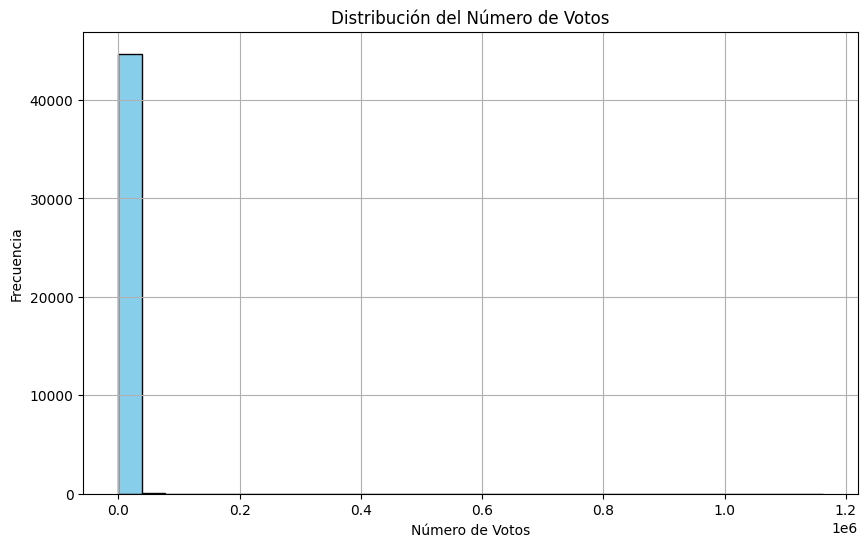

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data["Number of Votes"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribución del Número de Votos")
plt.xlabel("Número de Votos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

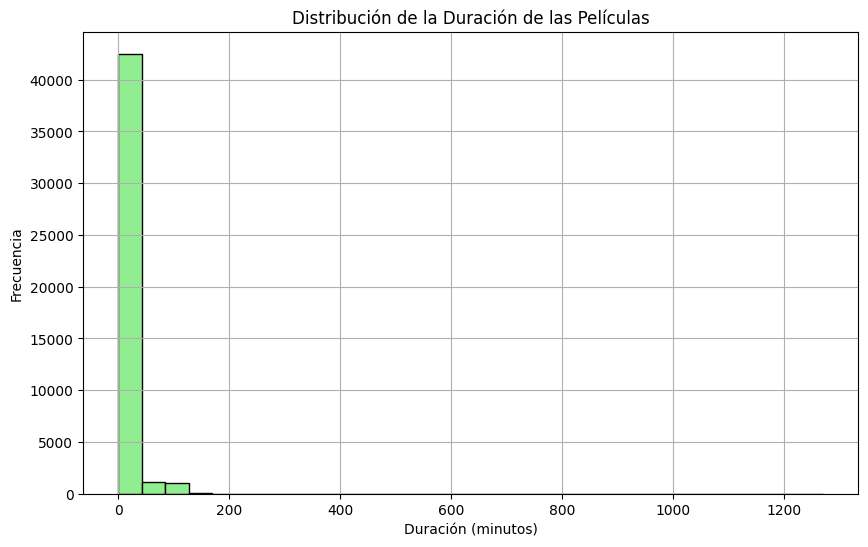

In [90]:
plt.figure(figsize=(10, 6))
plt.hist(data["Runtime"], bins=30, color="lightgreen", edgecolor="black")
plt.title("Distribución de la Duración de las Películas")
plt.xlabel("Duración (minutos)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

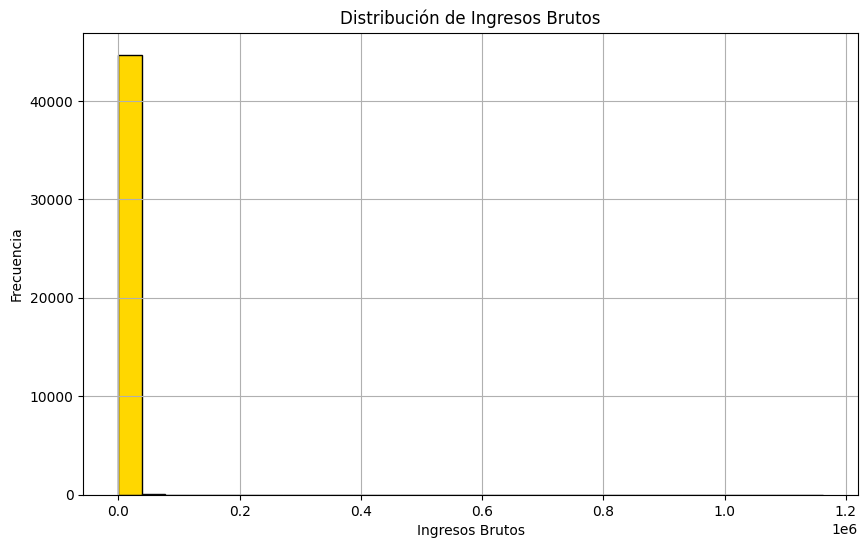

In [91]:
plt.figure(figsize=(10, 6))
plt.hist(data["Gross"], bins=30, color="gold", edgecolor="black")
plt.title("Distribución de Ingresos Brutos")
plt.xlabel("Ingresos Brutos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

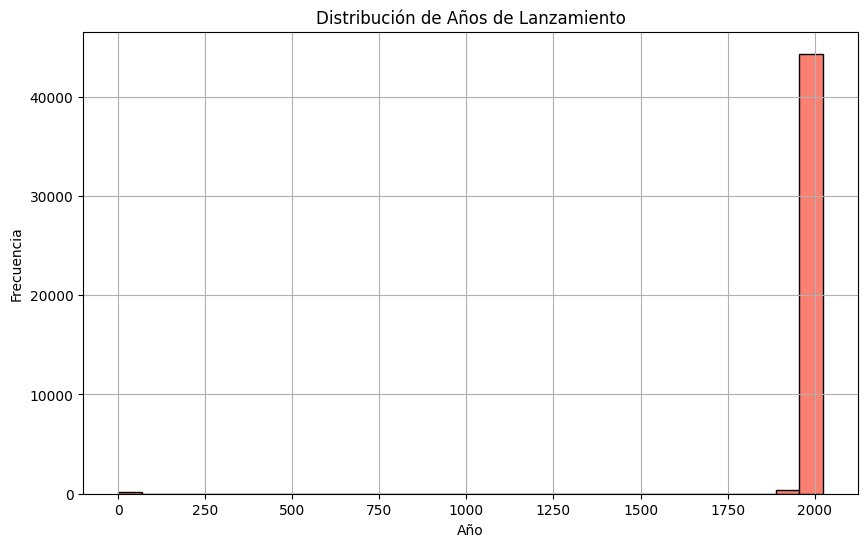

In [92]:
plt.figure(figsize=(10, 6))
plt.hist(data["Year"], bins=30, color="salmon", edgecolor="black")
plt.title("Distribución de Años de Lanzamiento")
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

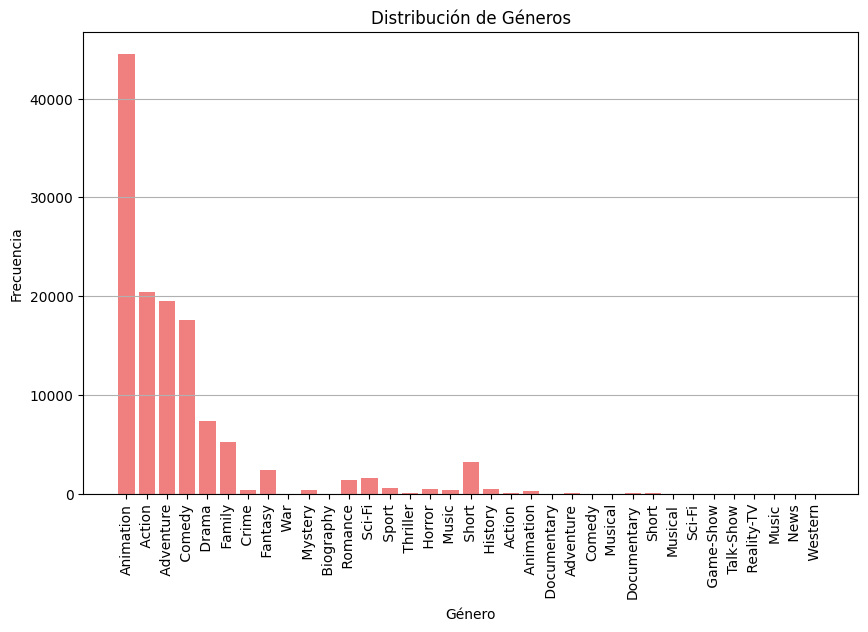

In [93]:
from collections import Counter

# Contar la frecuencia de cada género
genre_counts = Counter(data["Genre"].str.split(",").sum())

plt.figure(figsize=(10, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color="lightcoral")
plt.title("Distribución de Géneros")
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.show()

In [94]:
numeric_data = data[["Number of Votes", "Runtime", "Year", "Gross"]]
descriptive_stats = numeric_data.describe()
print(descriptive_stats)

       Number of Votes       Runtime          Year         Gross
count     4.484200e+04  44842.000000  44842.000000  4.484200e+04
mean      9.432640e+02     18.970251   1990.231234  9.432640e+02
std       1.681142e+04     25.233994    113.606169  1.681142e+04
min       0.000000e+00      0.000000      0.000000  0.000000e+00
25%       0.000000e+00      0.000000   1986.000000  0.000000e+00
50%       9.000000e+00     23.000000   1998.000000  9.000000e+00
75%       9.200000e+01     24.000000   2008.000000  9.200000e+01
max       1.162284e+06   1271.000000   2024.000000  1.162284e+06


```
3. Revisión de outliers: ahora que tienes variables numéricas revisa la distribución y
utiliza algún método para encontrar outliers, por ejemplo IQR o Z-score.
```

In [95]:
# Varaibles Numericas
def detect_numeric_features(df):
    numeric_features = df.select_dtypes(
        include=["int32", "int64", "float32", "float64"]
    ).columns.tolist()
    return numeric_features
numeric_features = detect_numeric_features(data)
print("numeric_features: ", numeric_features)

numeric_features:  ['User Rating', 'Number of Votes', 'Runtime', 'Year', 'Gross']


In [96]:
#Variables Categoricas
def detect_categorical_features(df):
    categorical_features = df.select_dtypes(
        include=["object", "category"]
    ).columns.tolist()
    return categorical_features


# Ejemplo de uso:
categorical_features = detect_categorical_features(data)
print("Variables Categóricas:", categorical_features)

Variables Categóricas: ['Title', 'Genre', 'Episode', 'Episode Title']


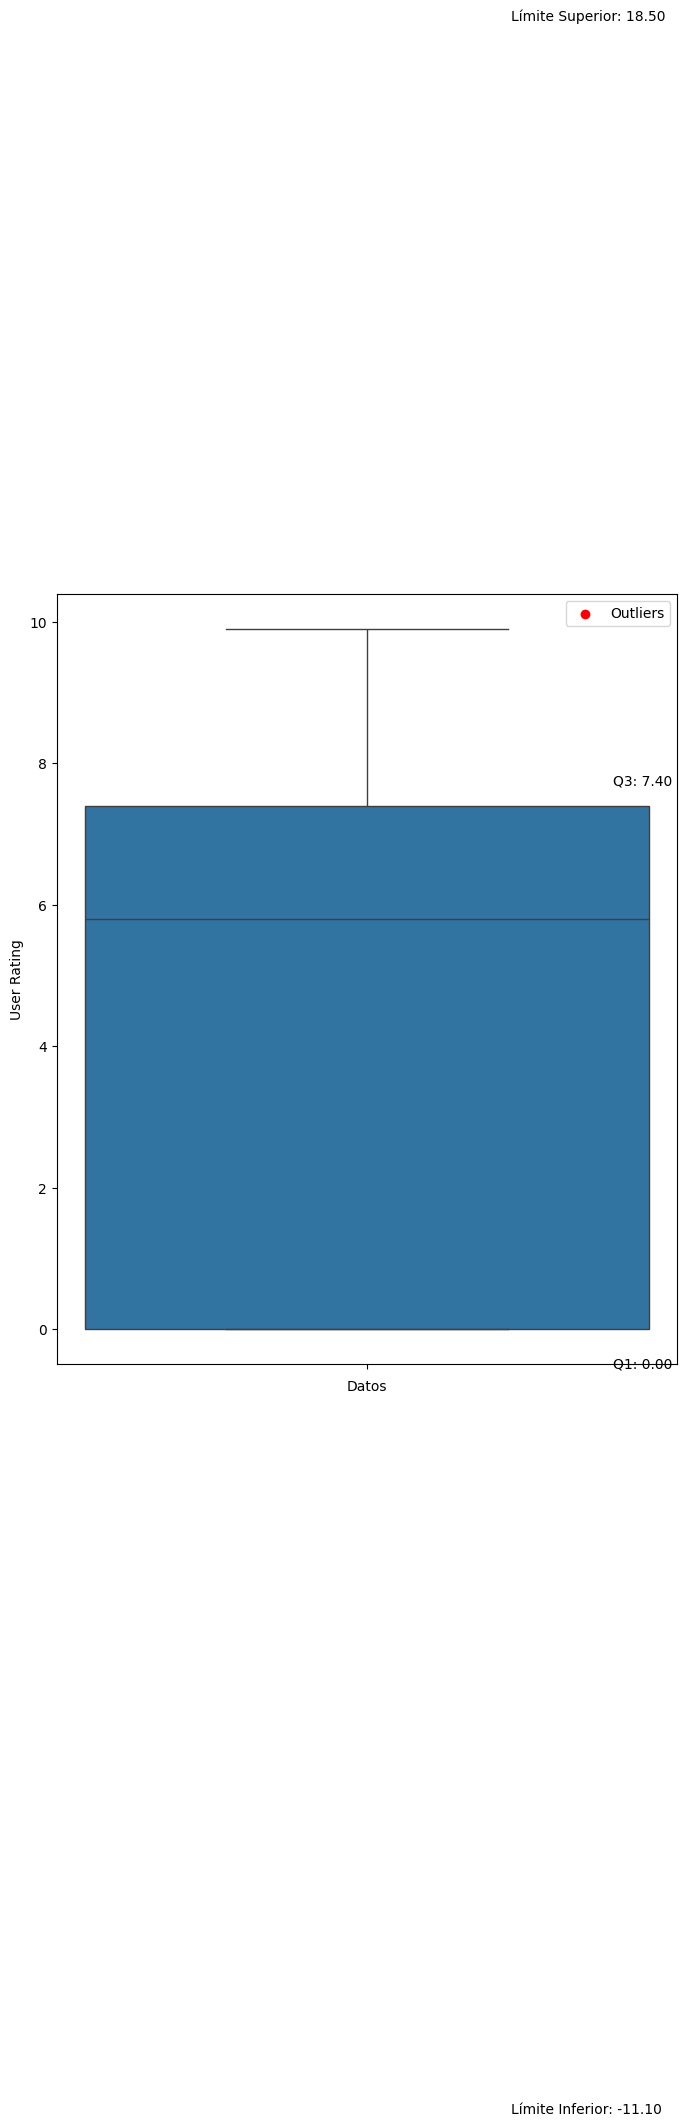

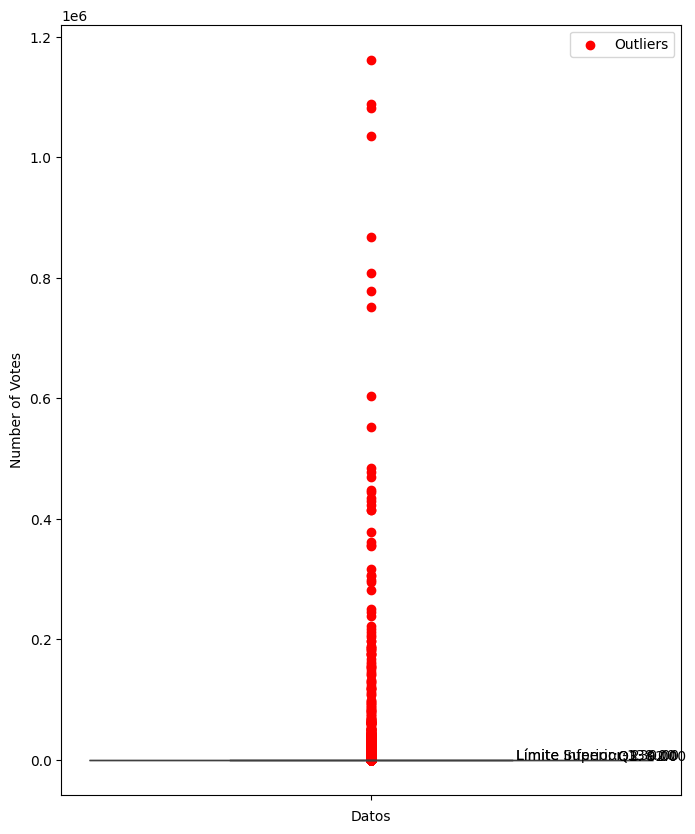

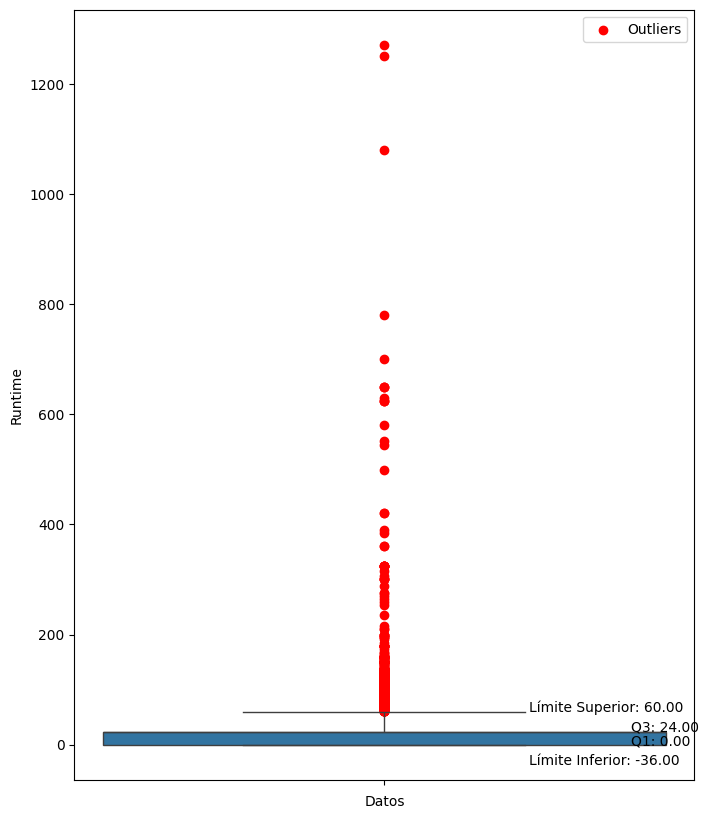

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplot_with_outliers(data, column_name, outlier_color='red', factor=1.5):
    # Calcular los estadísticos clave
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular los límites para los valores atípicos
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    # Crear un gráfico de diagrama de caja (boxplot)
    plt.figure(figsize=(8,10))
    sns.boxplot(y=data[column_name], showfliers=False)
    plt.ylabel(column_name)
    plt.xlabel('Datos')

    # Resaltar los valores atípicos en un color diferente
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    plt.scatter(y=outliers[column_name], x=[0]*len(outliers), color=outlier_color, label='Outliers')

    # Anotar los valores de límites y cuartiles en el gráfico
    plt.text(0.35, Q1-0.55, f'Q1: {Q1:.2f}', fontsize=10)
    plt.text(0.35, Q3+0.3, f'Q3: {Q3:.2f}', fontsize=10)
    plt.text(0.205, lower_bound, f'Límite Inferior: {lower_bound:.2f}', fontsize=10)
    plt.text(0.205, upper_bound, f'Límite Superior: {upper_bound:.2f}', fontsize=10)

    plt.legend()
    plt.show()
    return outliers

# Graficar outliers para la columna 'User Rating'
outliers_user_rating = plot_boxplot_with_outliers(data, 'User Rating')

# Graficar outliers para la columna 'Number of Votes'
outliers_number_of_votes = plot_boxplot_with_outliers(data, 'Number of Votes')

# Graficar outliers para la columna 'Runtime'
outliers_runtime = plot_boxplot_with_outliers(data, 'Runtime')


def remove_outliers(df, column_name, method="iqr", threshold=1.5):
    if method == "iqr":
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    elif method == "zscore":
        z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()
        df = df[np.abs(z_scores) <= threshold]
    else:
        print("Método no válido. Selecciona 'iqr' o 'zscore'.")
    return df


# Eliminar outliers detectados con el método del rango intercuartílico (IQR)
data = remove_outliers(data, "Runtime")
data = remove_outliers(data, "Number of Votes")

```
4. Transformación de variables finales: realiza un pequeño análisis de distribuciones y
transforma las variables aplicando transformaciones como logaritmo o
get_dummies para extraer las diferentes categorías. Genera una estrategia para lidiar
con los valores nulos y crea las variables que te parezcan necesarias.
```

In [98]:
categoricas=data["Genre"].str.split(", ").str.join("|").str.get_dummies()
categoricas

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
53,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45699,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45700,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45701,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45715,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


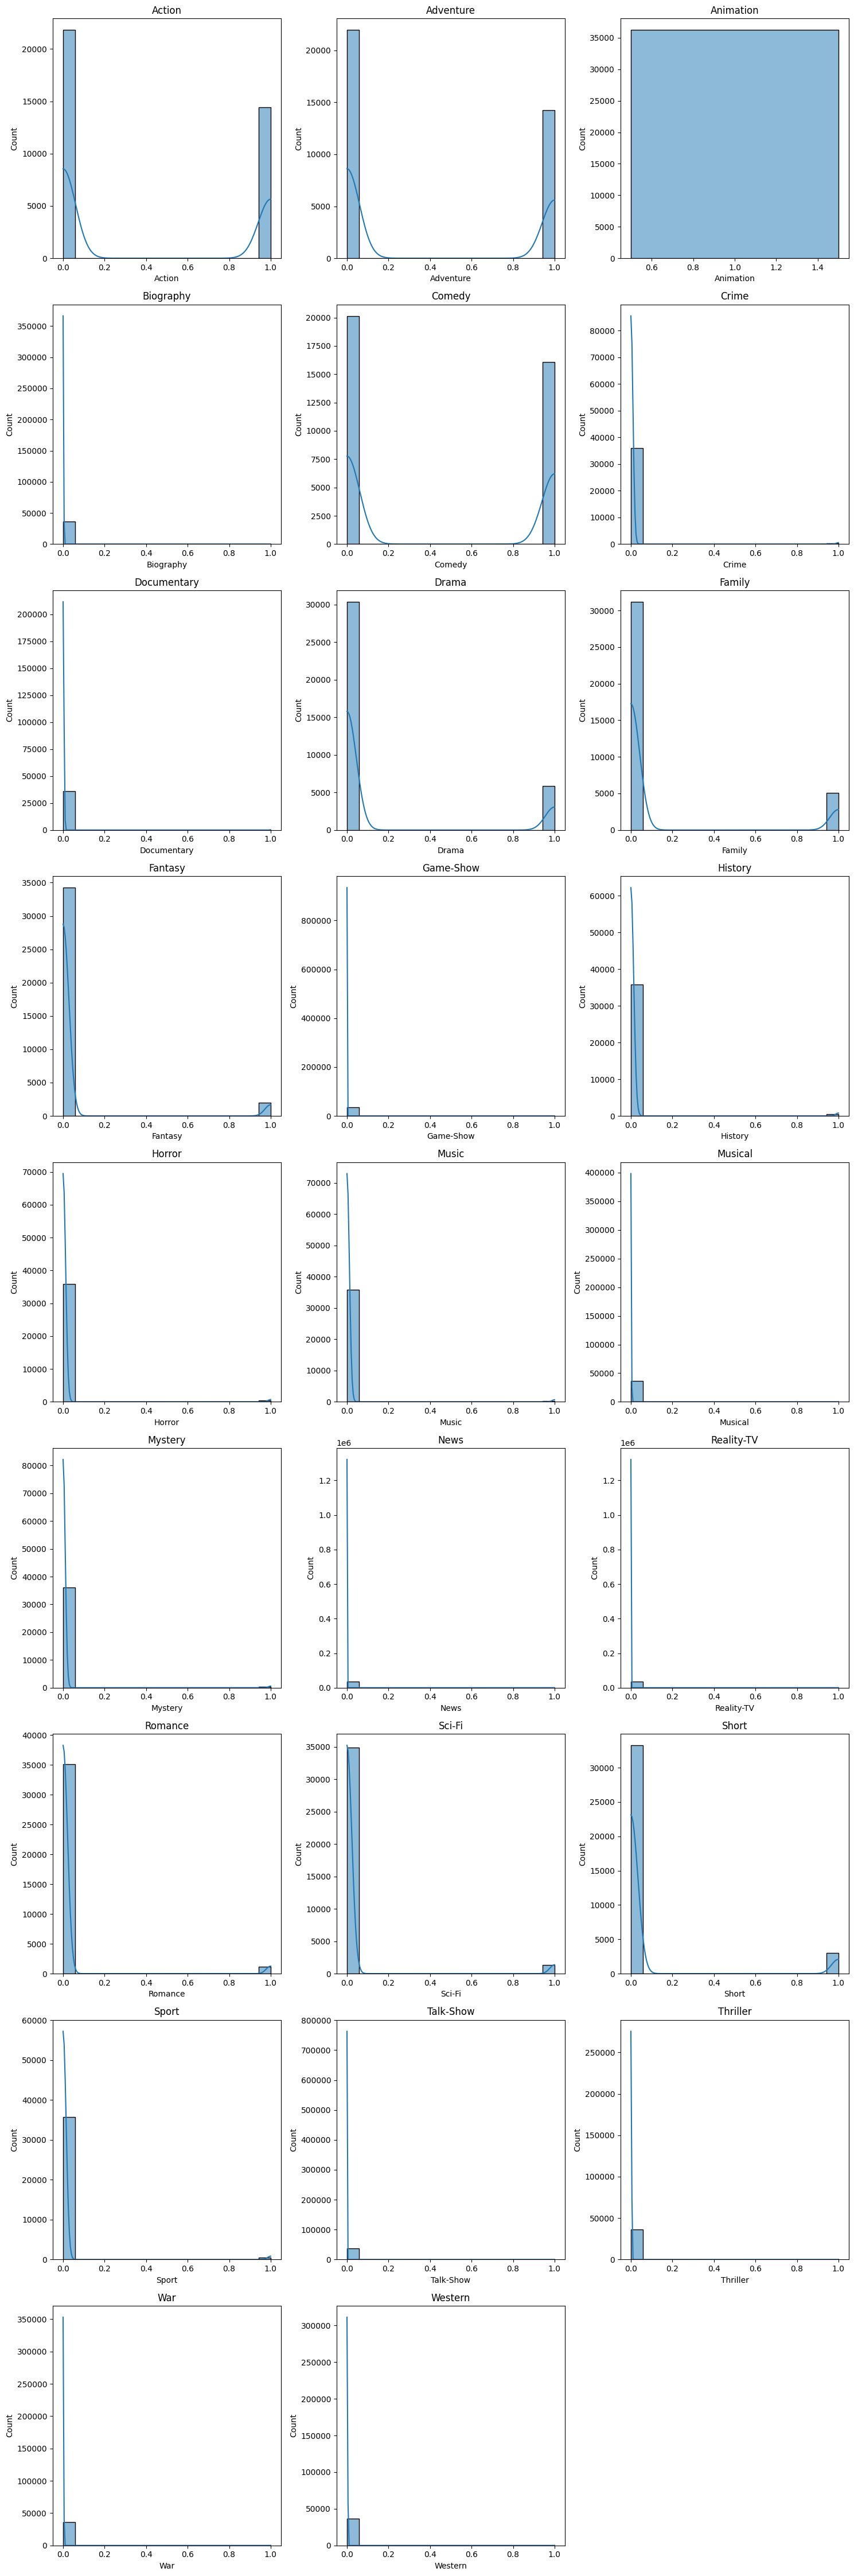

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns


def analyze_distribution(dataframe):
    # Obtenemos solo las columnas numéricas
    numeric_cols = dataframe.select_dtypes(include=["float64", "int64"])

    # Calculamos el número de filas y columnas necesarias para los subgráficos
    num_cols = len(numeric_cols.columns)
    num_rows = (
        num_cols - 1
    ) // 3 + 1  # Ajusta el número de columnas según tus preferencias

    # Configuramos el tamaño de la figura
    plt.figure(figsize=(15, 5 * num_rows))

    # Iteramos sobre las columnas numéricas y creamos histogramas para cada una
    for i, col in enumerate(numeric_cols.columns):
        plt.subplot(num_rows, 3, i + 1)  # Ajusta el número de columnas aquí
        sns.histplot(dataframe[col], kde=True)
        plt.title(col)

    # Ajustamos el espaciado entre subgráficos
    plt.tight_layout()

    # Mostramos el gráfico
    plt.show()


analyze_distribution(categoricas)

```
5. Análisis de Correlaciones: genera un análisis de correlaciones de las variables. No es
necesario que apliques todos los métodos vistos en clases, basta que argumentes
bien cuál utilizarás y por qué, y si necesitas algo más. La idea es generar gráficos
para entender la relación entre las diferentes variables, poniendo foco en la variable
objetivo.

``` 

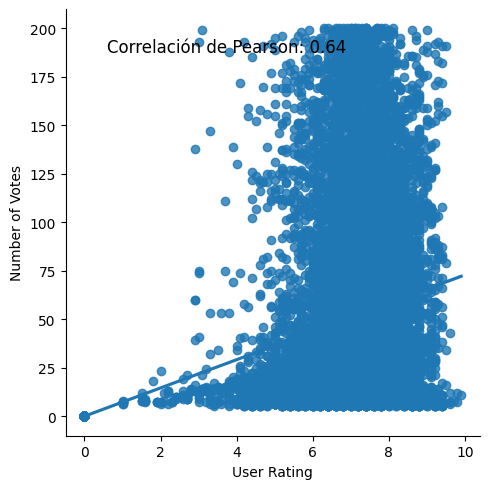

In [108]:
def plot_lmplot_with_pearson(dataframe, variable1, variable2):
    # Calcula la correlación de Pearson
    corr = dataframe[variable1].corr(dataframe[variable2])

    # Crea el gráfico de dispersión con una recta de regresión lineal
    sns.lmplot(x=variable1, y=variable2, data=dataframe)

    # Anota la correlación en el gráfico
    plt.text(
        0.1,
        0.9,
        f"Correlación de Pearson: {corr:.2f}",
        transform=plt.gca().transAxes,
        fontsize=12,
    )

    # Muestra el gráfico
    plt.show()


# Ejemplo de uso con nuestras variables numéricas
plot_lmplot_with_pearson(data, "User Rating", "Number of Votes")

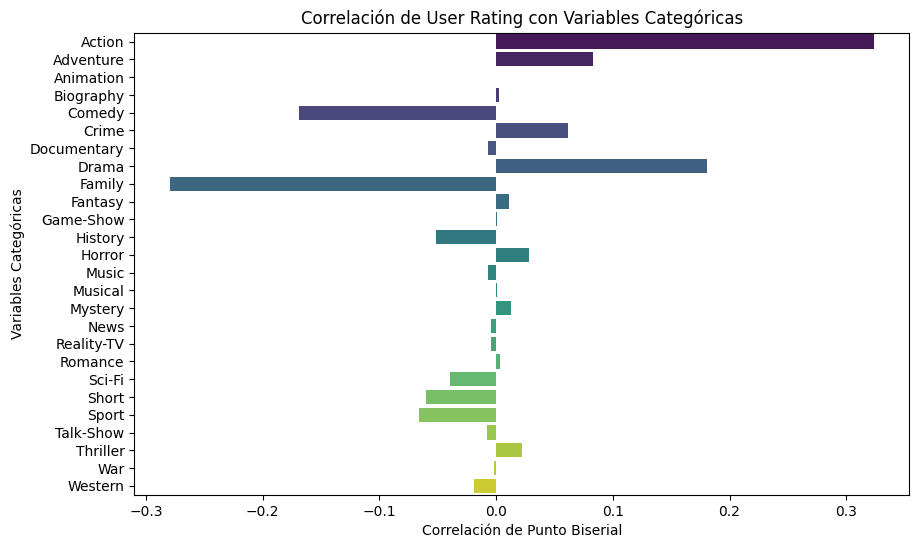

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación de punto biserial
correlation_categorical = categoricas.apply(
    lambda x: x.corr(data["User Rating"]), axis=0
)

# Visualizar la correlación de punto biserial
plt.figure(figsize=(10, 6))
sns.barplot(
    x=correlation_categorical.values, y=correlation_categorical.index, palette="viridis"
)
plt.xlabel("Correlación de Punto Biserial")
plt.ylabel("Variables Categóricas")
plt.title("Correlación de User Rating con Variables Categóricas")
plt.show()

In [101]:
# Paso 1: Calcular la tabla de contingencia
tabla_contingencia = pd.crosstab(data["Genre"], pd.cut(data["User Rating"], bins=5))

# Paso 2: Calcular las frecuencias esperadas
expected_data = (
    np.outer(tabla_contingencia.sum(axis=1), tabla_contingencia.sum(axis=0))
    / tabla_contingencia.values.sum()
)
expected_data = pd.DataFrame(expected_data, index=data["Genre"].unique())

# Paso 3: Calcular la estadística de chi-cuadrado
chi_squared_statistic = (tabla_contingencia - expected_data) ** 2 / expected_data
chi_squared = chi_squared_statistic.sum().sum()

# Paso 4: Calcular los grados de libertad
degrees_of_freedom = (tabla_contingencia.shape[0] - 1) * (
    tabla_contingencia.shape[1] - 1
)

# Paso 5: Calcular el valor p
p_value = 1 - chi2.cdf(chi_squared, degrees_of_freedom)

# Paso 6: Realizar la prueba de hipótesis
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    conclusion = "Se rechaza la hipótesis nula, hay una asociación significativa."
else:
    conclusion = (
        "No se rechaza la hipótesis nula, no hay evidencia de asociación significativa."
    )

# Imprimir resultados
print(f"Tabla de contingencia:\n{tabla_contingencia}\n")
print(f"Frecuencias esperadas:\n{expected_data}\n")
print(f"Tabla de chi cuadrado:\n{chi_squared_statistic}\n")
print(f"Estadística de chi-cuadrado: {chi_squared}\n")
print(f"Grados de libertad: {degrees_of_freedom}\n")
print(f"Valor p: {p_value}\n")
print(f"Conclusión: {conclusion}")

Tabla de contingencia:
User Rating                   (-0.0099, 1.98]  (1.98, 3.96]  (3.96, 5.94]  \
Genre                                                                       
Action, Adventure, Animation                0             0             2   
Action, Animation                           7             0             0   
Action, Animation, Adventure               26             0             0   
Action, Animation, Comedy                  14             0             2   
Action, Animation, Family                   1             0             0   
...                                       ...           ...           ...   
Short, Action, Animation                    1             0             0   
Short, Animation                           33             0             6   
Short, Animation, Comedy                    1             0             0   
Short, Animation, Sci-Fi                    1             0             0   
Short, Family, Animation                    0        

```
6. Genera una función que resuma todo el procesamiento necesario para el dataset,
que lea el dataset original y entregue un dataset ya tratado, con las columnas
transformadas y creadas.
```

In [102]:
def extract_year(year_string):
    match = re.search(r"\d+", str(year_string))
    if match:
        return int(match.group())
    else:
        return 0


def Organizar_Data(data):
    # Eliminar filas duplicadas
    data = data.drop_duplicates()

    # Eliminar columnas no necesarias
    data = data.drop(columns=["Certificate", "Summary", "Metascore", "Stars"])

    # Rellenar NaN en la columna 'Episode Title' con 0
    data["Episode Title"] = data["Episode Title"].fillna(0)

    # Convertir columnas a tipo string
    data["Title"] = data["Title"].astype(str)
    data["Genre"] = data["Genre"].astype(str)

    # Limpiar y convertir variables numéricas
    data = data[data["Runtime"] != "Runtime"]
    data["Runtime"] = (
        data["Runtime"]
        .str.replace(" min", "")
        .str.replace(",", "")
        .fillna(0)
        .astype(int)
    )
    data["Year"] = data["Year"].apply(extract_year)
    data["User Rating"] = data["User Rating"].fillna(0)
    data["Number of Votes"] = data["Number of Votes"].fillna(0).astype(int)
    data["Gross"] = data["Gross"].fillna(0).astype(int)

    # Variables categóricas
    categoricas = data["Genre"].str.split(", ").str.join("|").str.get_dummies()
    data = pd.concat([data, categoricas], axis=1)

    return data



data2 = pd.read_excel("imdb_anime.xlsx")
data3 = Organizar_Data(data2)
data3.to_csv("data_tratada.csv", index=False)

In [103]:
data3

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Gross,Episode,Episode Title,Action,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,One Piece,"Animation, Action, Adventure",8.9,187689,24,1999,187689,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895,99,2023,28895,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108,92,2023,189108,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457,24,2013,434457,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909,24,2020,82909,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45712,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.3,3432,24,2019,3432,1,Tsuzumi Mansion,1,...,0,0,0,0,0,0,0,0,0,0
45713,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.9,3309,24,2019,3309,1,"The Boar Bares Its Fangs, Zenitsu Sleeps",1,...,0,0,0,0,0,0,0,0,0,0
45714,One Piece,"Animation, Action, Adventure",9.4,2743,0,1999,2743,1,Time for Farewell! Pudding's One Last Request!,1,...,0,0,0,0,0,0,0,0,0,0
45715,Marmalade Boy,"Animation, Comedy, Drama",0.0,0,24,1994,0,1,Hijiri naru yoru (ivu nanoni hitori bocchi...),0,...,0,0,0,0,0,0,0,0,0,0


```
7. A partir de las columnas que obtuviste realiza una selección de variables según los
siguientes métodos:
a. Filtros basados en correlaciones
b. Forward Selection.
Compara ambos métodos y responde si coincide lo resultante con lo obtenido en el
análisis exploratorio.
```

In [113]:
numeric_columns = data.select_dtypes(include=[np.number])
correlation_data = numeric_columns.corr()["User Rating"].sort_values(ascending=False)
print(correlation_data)

User Rating        1.000000
Number of Votes    0.641707
Gross              0.641707
Runtime            0.230405
Year               0.091466
Name: User Rating, dtype: float64


"User Rating" tiene una correlación positiva fuerte con "Number of Votes" y "Gross", ambas con una correlación de aproximadamente 0.64. Esto sugiere que las películas con una mayor cantidad de votos y mayores ganancias tienden a tener una calificación de usuario más alta.

La correlación entre "User Rating" y "Runtime" es moderadamente positiva, alrededor de 0.23. Esto indica que las películas con una duración más larga tienden a tener una calificación de usuario ligeramente más alta.

Por último, la correlación entre "User Rating" y "Year" es bastante baja, alrededor de 0.09. Esto sugiere que no hay una relación fuerte entre el año de lanzamiento de la película y su calificación de usuario.

Estas correlaciones reflejan en cierta medida lo que podríamos haber esperado en el análisis exploratorio, como la intuición de que las películas más populares (medidas por la cantidad de votos y las ganancias)